In [13]:
import sys
sys.path.append("..") #this is to add the avobe folder to the package directory
import geopandas as gpd
import rasterio
from rasterio.plot import show
import nexus_tool.weap_tools as wp
import matplotlib.pyplot as plt
import os

In [7]:
gis_folder = os.path.join('Data', 'GIS') #define path to gis data folder

## Mask rasters into country boundaries

In [17]:
#Masking water table depth from the Euroasian model v2 to Jordan boundaries
out_image, out_meta = wp.mask_raster(raster_path=os.path.join(gis_folder, 
                                                              'Water Table Depth', 
                                                              'Eurasia_model_wtd_v2.nc'), 
                                     mask_path=os.path.join(gis_folder, 
                                                            'Admin', 
                                                            'JOR_adm0.shp'), 
                                     crs='EPSG:4326')

#Writing masked raster to file
with rasterio.open(os.path.join(gis_folder, 
                                'Water Table Depth', 
                                'Jordan_wtd.tif'), 
                   "w", **out_meta) as dest:
    dest.write(out_image)

#Masking elevation from DEM model to Jordan boundaries
out_image, out_meta = wp.mask_raster(os.path.join(gis_folder, 
                                                  'DEM', 
                                                  'DEM.tif'), 
                                     os.path.join(gis_folder, 
                                                  'Admin', 
                                                  'JOR_adm0.shp'), 
                                     'EPSG:4326')

#Writing masked raster to file
with rasterio.open(os.path.join(gis_folder, 
                                'DEM', 
                                'Jordan_DEM.tif'), 
                   "w", **out_meta) as dest:
    dest.write(out_image)

## Reprojecting rasters

In [18]:
dst_crs = 'EPSG:28192' #Define crs system (28192=PalestineBelt)

wp.reproject_raster(os.path.join(gis_folder, 'Water Table Depth', 'Jordan_wtd.tif'), 
                    dst_crs, 
                    os.path.join(gis_folder, 'Water Table Depth', 'Jordan_wtd_projected.tif'))
wp.reproject_raster(os.path.join(gis_folder, 'DEM', 'DEM.tif'),
                    dst_crs, 
                    os.path.join(gis_folder, 'DEM', 'DEM_projected.tif'))
wp.reproject_raster(os.path.join(gis_folder, 'DEM', 'Jordan_DEM.tif'),
                    dst_crs, 
                    os.path.join(gis_folder, 'DEM', 'Jordan_DEM_projected.tif'))

## Displaying rasters

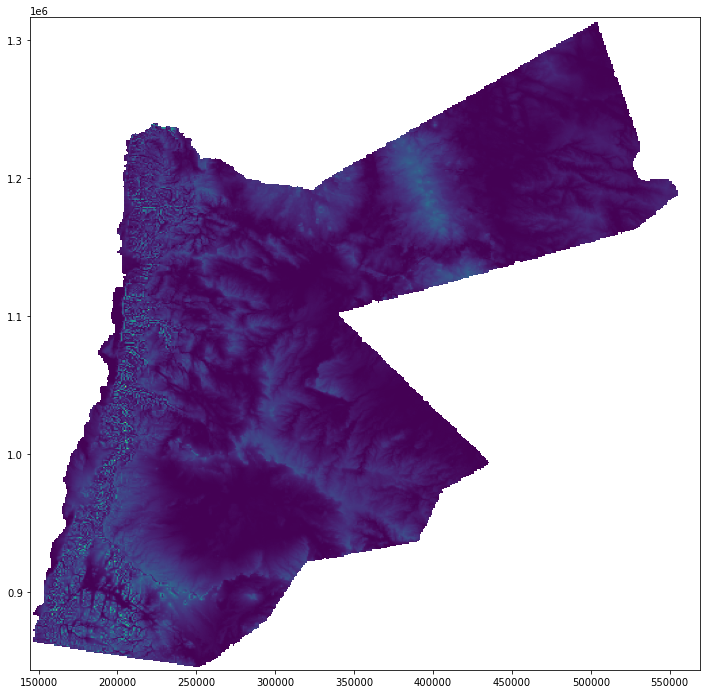

In [15]:
with rasterio.open(os.path.join(gis_folder, 'Water Table Depth', 'Jordan_wtd_projected.tif')) as src:
    fig, ax = plt.subplots(figsize=(12, 12))
    show(src, ax=ax, aspect='auto')

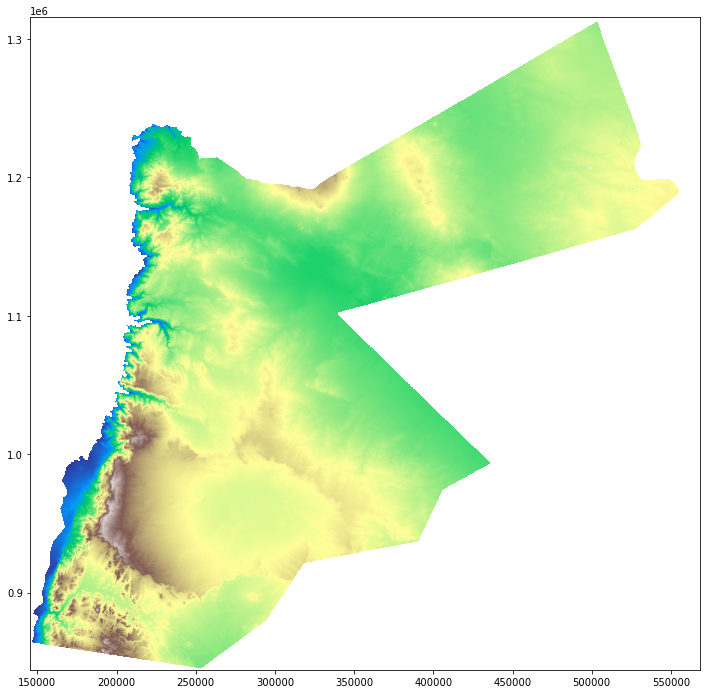

In [19]:
with rasterio.open(os.path.join(gis_folder, 'DEM', 'Jordan_DEM_projected.tif')) as src:
    fig, ax = plt.subplots(figsize=(12, 12))
    show(src, ax=ax, aspect='auto', cmap='terrain')